<a href="https://colab.research.google.com/github/dharanipriyaR24/deep-learning-real-estate/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real Estate Price Prediction project using Deep Learning.
Step-by-Step Implementation
1. Import Libraries
2. Load Dataset
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Feature Engineering
6. Data Splitting
7. Model Building
8. Model Training
9. Model Evaluation
10. Making Predictions on Test Data
11. Saving the Model and Predictions



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import os

In [49]:
train_df = pd.read_csv('/content/house_prices_data/train.csv')
test_df = pd.read_csv('/content/house_prices_data/test.csv')
print(f'Training data shape: {train_df.shape}')
print(f'Test data shape: {test_df.shape}')

Training data shape: (1460, 81)
Test data shape: (1459, 80)


In [51]:
# Display first 5 rows of training data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
# Statistical summary of numerical features
train_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


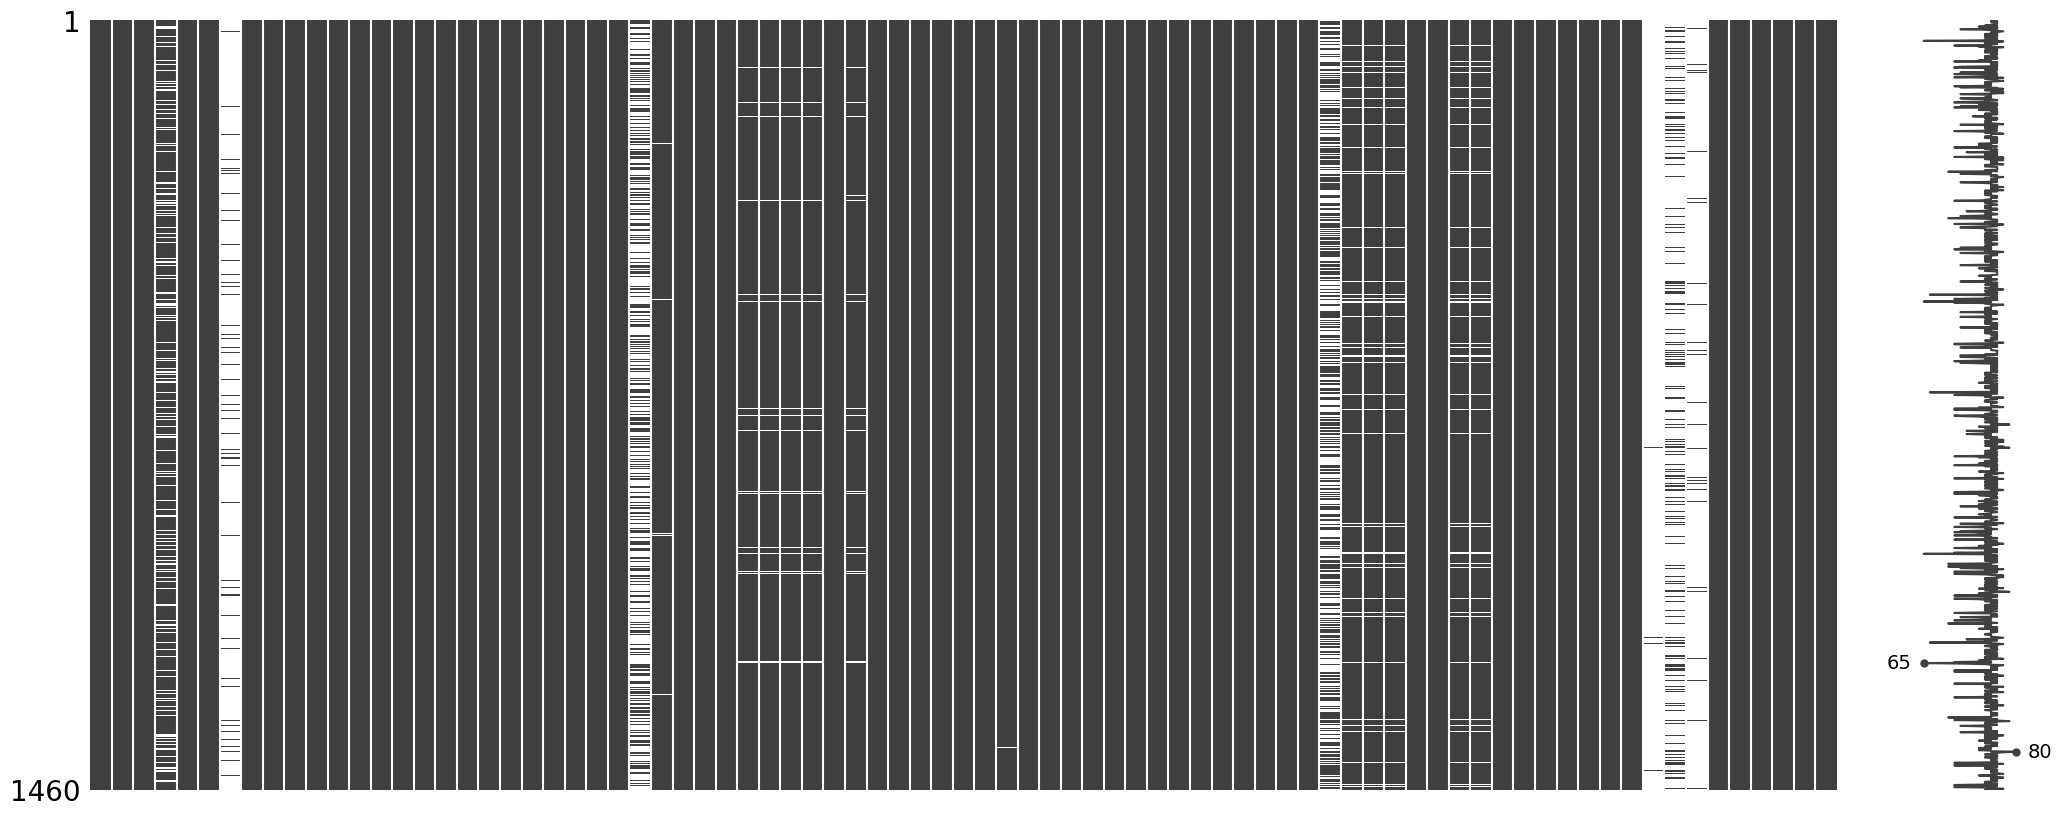

,Missing Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [53]:
# Visualize missing values using missingno
msno.matrix(train_df)
plt.show()

# Percentage of missing values per column
missing_values = train_df.isnull().sum().sort_values(ascending=False)
percent_missing = (missing_values / len(train_df)) * 100
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Percentage': percent_missing})
missing_data[missing_data['Missing Count'] > 0]


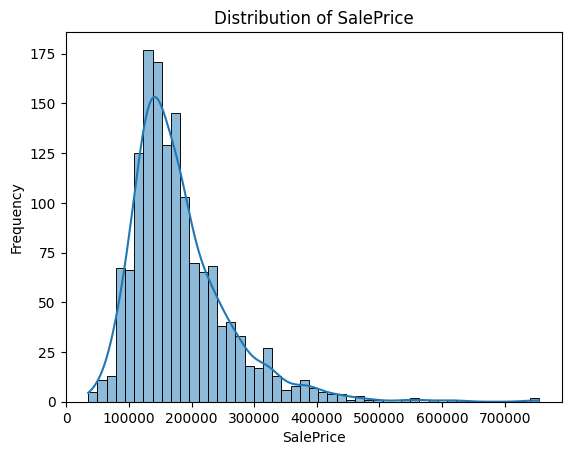

In [54]:
# Distribution plot of SalePrice
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


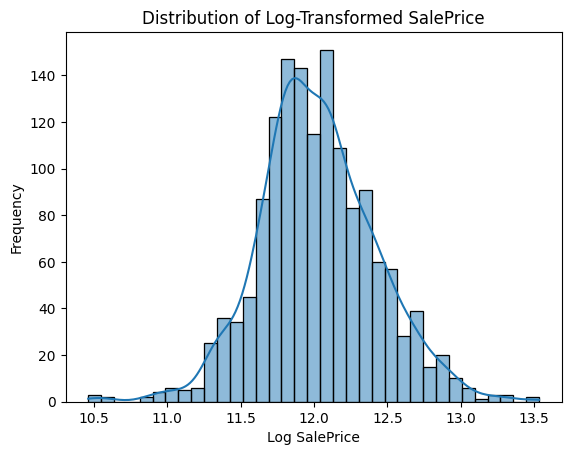

In [55]:
# Log transform SalePrice
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Check distribution after log transformation
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log SalePrice')
plt.ylabel('Frequency')
plt.show()


In [61]:
train_df = pd.read_csv('/content/house_prices_data/train.csv')


In [67]:
non_numeric_cols = train_df.select_dtypes(exclude=[float, int]).columns
print("Non-numeric columns:")
print(non_numeric_cols)


Non-numeric columns:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [68]:
# Convert categorical features to numeric using one-hot encoding
train_df_encoded = pd.get_dummies(train_df, drop_first=True)


In [69]:
corr_matrix = train_df_encoded.corr()


In [76]:
# Check for missing values
missing_values = train_df_encoded.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Optionally, handle missing values (e.g., fill or drop)
train_df_encoded = train_df_encoded.fillna(train_df_encoded.mean())


Missing values in each column:
Series([], dtype: int64)


In [77]:
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False)[1:11]
print(top_corr_features)


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
ExterQual_TA    0.589044
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [78]:
# Save the ID columns
train_ID = train_df['Id']
test_ID = test_df['Id']

# Drop ID columns
train_df.drop('Id', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)

# Combine datasets
n_train = train_df.shape[0]
n_test = test_df.shape[0]
y_train = train_df['SalePrice'].values
all_data = pd.concat((train_df.drop(['SalePrice'], axis=1), test_df)).reset_index(drop=True)

print(f'All data shape: {all_data.shape}')


All data shape: (2919, 79)


In [79]:
# Total missing values
total_missing = all_data.isnull().sum().sort_values(ascending=False)
percent_missing = (total_missing / all_data.shape[0]) * 100
missing_data = pd.DataFrame({'Total': total_missing, 'Percent': percent_missing})
missing_data = missing_data[missing_data['Total'] > 0]
missing_data


,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071


In [80]:
# PoolQC : data description says NA means "No Pool"
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

# MiscFeature : data description says NA means "no misc feature"
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

# Alley : data description says NA means "no alley access"
all_data['Alley'] = all_data['Alley'].fillna('None')

# Fence : data description says NA means "no fence"
all_data['Fence'] = all_data['Fence'].fillna('None')

# FireplaceQu : data description says NA means "no fireplace"
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

# LotFrontage : fill with median of neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : NA means no garage
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

# GarageYrBlt, GarageArea, GarageCars : NA means no garage
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data[col] = all_data[col].fillna(0)

# BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual : NA means no basement
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']:
    all_data[col] = all_data[col].fillna('None')

# MasVnrArea and MasVnrType : NA means no masonry veneer
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

# MSZoning (classification) : 'RL' is the most common value
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Utilities : Since all records have 'AllPub', we can drop this feature
all_data.drop(['Utilities'], axis=1, inplace=True)

# Functional : 'Typ' is the most common value
all_data['Functional'] = all_data['Functional'].fillna('Typ')

# Electrical : 'SBrkr' is the most common value
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

# KitchenQual : 'TA' is the most common value
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : fill with mode
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

# SaleType : fill with mode
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# Check remaining missing values
all_data.isnull().sum().max() # Should return 0


2

In [81]:
from scipy.stats import skew
from scipy.special import boxcox1p

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skewness
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)


,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.145323
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.929996


In [82]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print(f'There are {skewness.shape[0]} skewed numerical features to Box Cox transform')

from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)


There are 23 skewed numerical features to Box Cox transform


In [83]:
# Get dummy variables
all_data = pd.get_dummies(all_data)
print(all_data.shape)


(2919, 300)


In [84]:
# Standardizing numerical features
scaler = StandardScaler()
numerical = numeric_feats
all_data[numerical] = scaler.fit_transform(all_data[numerical])


In [85]:
# Total area
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Age of the house
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']

# Remodel age
all_data['RemodelAge'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Total bathrooms
all_data['TotalBath'] = all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']) + \
                        all_data['FullBath'] + (0.5 * all_data['HalfBath'])

# Total porch area
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + \
                           all_data['3SsnPorch'] + all_data['ScreenPorch']


In [86]:
print(all_data.shape)


(2919, 305)


In [87]:
# Separate train and test data
X_train = all_data[:n_train]
X_test = all_data[n_train:]

# Target variable
y_train = train_df['SalePrice']


In [88]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mse'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)


In [90]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │          39,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,537 (193.50 KB)

 Trainable params: 49,537 (193.50 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Fit model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=500,
                    batch_size=32,
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)


Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 38759448576.0000 - mse: 38759448576.0000 - val_loss: 39892824064.0000 - val_mse: 39892824064.0000 - learning_rate: 0.0010
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38159286272.0000 - mse: 38159286272.0000 - val_loss: 39507329024.0000 - val_mse: 39507329024.0000 - learning_rate: 0.0010
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38985486336.0000 - mse: 38985486336.0000 - val_loss: 37195218944.0000 - val_mse: 37195218944.0000 - learning_rate: 0.0010
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35795288064.0000 - mse: 35795288064.0000 - val_loss: 29679284224.0000 - val_mse: 29679284224.0000 - learning_rate: 0.0010
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26599256064.0000 - mse: 26599256064.0000 - val_loss: 15619511296.0000 - val_mse: 15619511296.0000 - learning_rate: 0.0010
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13247171584.0000 - mse: 13247171584.

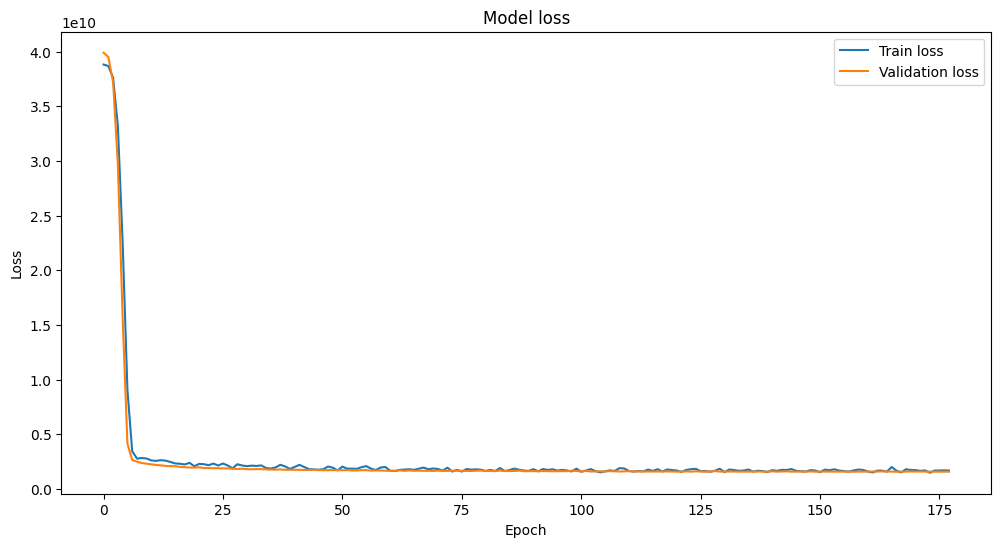

In [92]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd # Import pandas to handle potential data type issues

# Define K-Fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize array to store RMSE for each fold
rmse_list = []

# Define early stopping and learning rate reduction callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

for train_index, val_index in kfold.split(X_train):
    X_tr, X_val = X_train.values[train_index], X_train.values[val_index]
    y_tr, y_val = y_train.values[train_index], y_train.values[val_index]

    # Convert to float32 and handle potential NaN/inf values
    X_tr = np.nan_to_num(X_tr).astype(np.float32)
    X_val = np.nan_to_num(X_val).astype(np.float32)
    y_tr = np.nan_to_num(y_tr).astype(np.float32)
    y_val = np.nan_to_num(y_val).astype(np.float32)

    model = Sequential()
    model.add(Dense(128, input_dim=X_tr.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

    model.fit(X_tr, y_tr,
              epochs=200,
              batch_size=32,
              verbose=0,
              validation_data=(X_val, y_val),
              callbacks=[early_stop, reduce_lr])

    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_list.append(rmse)
    print(f'Fold RMSE: {rmse}')

print(f'\nAverage RMSE: {np.mean(rmse_list)}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold RMSE: 35738.12109375


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold RMSE: 203405.625


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold RMSE: 194863.421875


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold RMSE: 195986.078125


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold RMSE: 194171.84375

Average RMSE: 164833.03125


In [97]:
# Convert log RMSE to original scale
original_rmse = np.expm1(np.mean(rmse_list))
print(f'Original Scale RMSE: {original_rmse}')


Original Scale RMSE: inf


<ipython-input-97-b85fad165a15>:2: RuntimeWarning: overflow encountered in expm1
  original_rmse = np.expm1(np.mean(rmse_list))


In [98]:
# Train final model on all training data
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

model.fit(X_train, y_train,
          epochs=200,
          batch_size=32,
          verbose=1,
          callbacks=[early_stop, reduce_lr])

# Predict on test data
preds_test = model.predict(X_test)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 37502853120.0000 - learning_rate: 0.0010
Epoch 2/200
 1/46 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - loss: 38373892096.0000

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39109472256.0000 - learning_rate: 0.0010
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36542709760.0000 - learning_rate: 0.0010
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26512295936.0000 - learning_rate: 0.0010
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10124079104.0000 - learning_rate: 0.0010
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3506536192.0000 - learning_rate: 0.0010
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2537485568.0000 - learning_rate: 0.0010
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2903999488.0000 - learning_rate: 0.0010
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3042708224.0000 - learning_rate: 0.0010
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2948311296.0000 - learning_rate: 0.0010
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2584490496.0000 - learning_rate: 0.0010
Epoch 12/200
46/

In [99]:
# Exponential transformation to get original SalePrice
preds_test = np.expm1(preds_test)


<ipython-input-99-65cc75b5be38>:2: RuntimeWarning: overflow encountered in expm1
  preds_test = np.expm1(preds_test)


In [100]:
# Prepare submission file
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = preds_test.flatten()
submission.to_csv('submission.csv', index=False)

print('Submission file saved successfully!')


Submission file saved successfully!


In [101]:
# Save the model
model.save('house_price_model.h5')
print('Model saved successfully!')


Model saved successfully!
